In [59]:
import random

def simulate_game(n_good_initial, k_bad_initial,starting_payout=0 ):
    """
    Simulates a single game based on the updated rules.

    Args:
        n_good_initial (int): Initial number of good players.
        k_bad_initial (int): Initial number of bad players.

    Returns:
        dict: Outcome of the game containing winner, payouts, and remaining players.
    """
    # Initialize the list of players
    # 'G' represents a good player, 'B' represents a bad player
    players = ['G'] * n_good_initial + ['B'] * k_bad_initial
    payout_cumulated = starting_payout
    while True:
        payout_cumulated += 1
        n_good = players.count('G')
        n_bad = players.count('B')

        # Check for termination based on new rules
        if n_good == 0:
            # Bad team wins
            remaining = n_bad
            payout = payout_cumulated /  remaining
            return {
                'winner': 'Bad',
                'payouts': [payout] * remaining,
                'remaining_good': 0,
                'remaining_bad': remaining
            }
        if n_bad == 0:
            # Good team wins
            remaining = n_good
            payout = payout_cumulated /  remaining
            return {
                'winner': 'Good',
                'payouts': [payout] * remaining,
                'remaining_good': remaining,
                'remaining_bad': 0
            }
        if n_good <= n_bad:
            # Bad team wins as per the new condition
            remaining = n_bad
            payout = payout_cumulated /  remaining
            return {
                'winner': 'Bad',
                'payouts': [payout] * remaining,
                'remaining_good': 0,
                'remaining_bad': remaining
            }

        # Step 1: Bad players kill a good player
        if n_good > 0 and n_bad > 0:
            # Randomly select a good player to be killed
            good_indices = [i for i, p in enumerate(players) if p == 'G']
            killed_good_player = random.choice(good_indices)
            players.pop(killed_good_player)

        # Update counts after step 1
        n_good = players.count('G')
        n_bad = players.count('B')

        # Check for termination after step 1
        if n_good == 0:
            # Bad team wins
            remaining = n_bad
            payout = payout_cumulated /  remaining
            return {
                'winner': 'Bad',
                'payouts': [payout] * remaining,
                'remaining_good': 0,
                'remaining_bad': remaining
            }
        if n_bad == 0:
            # Good team wins
            remaining = n_good
            payout = payout_cumulated /  remaining
            return {
                'winner': 'Good',
                'payouts': [payout] * remaining,
                'remaining_good': remaining,
                'remaining_bad': 0
            }
        if n_good <= n_bad:
            # Bad team wins as per the new condition
            remaining = n_bad
            payout = payout_cumulated / remaining
            return {
                'winner': 'Bad',
                'payouts': [payout] * remaining,
                'remaining_good': n_good,
                'remaining_bad': remaining
            }

        # Step 2: Random player dies
        dead_player = random.choice(players)
        players.remove(dead_player)

def monte_carlo_simulation(n_good, k_bad, starting_payout, num_simulations=1000):
    """
    Runs the Monte Carlo simulation based on the updated game rules.

    Args:
        n_good (int): Initial number of good players.
        k_bad (int): Initial number of bad players.
        num_simulations (int): Number of simulations to run.

    Returns:
        dict: Aggregated results including expected payouts and win probabilities.
    """
    total_payout_good = 0.0
    total_payout_bad = 0.0
    count_wins_good = 0
    count_wins_bad = 0
    turns_list=[]

    for _ in range(num_simulations):
        result = simulate_game(n_good, k_bad, starting_payout)
        winner = result['winner']
        payout = result['payouts'][0]
        remaining_good = result['remaining_good']
        remaining_bad = result['remaining_bad']
        turns=sum(result['payouts'])-starting_payout
        turns_list.append(turns)

        if winner == 'Good':
            count_wins_good += 1
            # Each good player receives payout = 1 / remaining_good
            # Total payout for good team = 1 (since 1/remaining_good * remaining_good)
            total_payout_good += payout
            # Bad players receive nothing
        else:
            count_wins_bad += 1
            # Each bad player receives payout = 1 / remaining_bad
            # Total payout for bad team = 1 (since 1/remaining_bad * remaining_bad)
            total_payout_bad += payout
            # Good players receive nothing

    # Calculate expected payouts per player
    expected_payout_good = (total_payout_good / num_simulations) / n_good
    expected_payout_bad = (total_payout_bad / num_simulations) / k_bad
    probability_win_good = count_wins_good / num_simulations
    probability_win_bad = count_wins_bad / num_simulations
    

    return {
        'Expected Payout per Good Player': expected_payout_good,
        'Expected Payout per Bad Player': expected_payout_bad,
        'Probability Good Wins': probability_win_good,
        'Probability Bad Wins': probability_win_bad,
        'Average number of turns': sum(turns_list)/num_simulations,
        'Turns': turns_list
    }

# Parameters
n = 19  # Number of good players
k = 3   # Number of bad players
num_simulations = 100000
starting_payout = 1
# Run the simulation
results = monte_carlo_simulation(n, k,starting_payout, num_simulations)

# Display the results
print("Monte Carlo Simulation Results (After Modification):")
print(f"Expected Payout per Good Player: {results['Expected Payout per Good Player']:.4f}")
print(f"Expected Payout per Bad Player: {results['Expected Payout per Bad Player']:.4f}")
print(f"Probability Good Team Wins: {results['Probability Good Wins'] * 100:.2f}%")
print(f"Probability Bad Team Wins: {results['Probability Bad Wins'] * 100:.2f}%")
print(f"Average number of turns: {results['Average number of turns']:.2f}")

turns_list = results['Turns']
# turns_list


Monte Carlo Simulation Results (After Modification):
Expected Payout per Good Player: 0.0683
Expected Payout per Bad Player: 1.8474
Probability Good Team Wins: 33.20%
Probability Bad Team Wins: 66.80%
Average number of turns: 10.20


In [83]:
import random

def simulate_game(n_good_initial, k_bad_initial,starting_payout=0, daily_payout=0):
    """
    Simulates a single game based on the updated rules.

    Args:
        n_good_initial (int): Initial number of good players.
        k_bad_initial (int): Initial number of bad players.

    Returns:
        dict: Outcome of the game containing winner, payouts, and remaining players.
    """
    # Initialize the list of players
    # 'G' represents a good player, 'B' represents a bad player
    players = ['G'] * n_good_initial + ['B'] * k_bad_initial
    payout_cumulated = starting_payout
    while True:
        payout_cumulated += daily_payout
        n_good = players.count('G') 
        n_bad = players.count('B') + players.count('D')
        remaining_player = n_good + n_bad
        if remaining_player == 5:
            while True:
                n_good = players.count('G') 
                n_bad = players.count('B') + players.count('D')
                remaining_player = n_good + n_bad
                payout = payout_cumulated /  remaining_player
                if n_good == 0:
                    return {
                        'winner': 'Bad',
                        'payouts': [payout] * remaining_player,
                        'remaining_good': 0,
                        'remaining_bad': remaining_player,
                        'good_payouts' : payout *  players.count('D'),
                        'bad_payouts': payout * players.count('B')
                        }
                if n_bad == 0:
                    return {
                            'winner': 'Bad',
                            'payouts': [payout] * remaining_player,
                            'remaining_good': 0,
                            'remaining_bad': remaining_player,
                            'good_payouts' : payout *  players.count('G'),
                            'bad_payouts': 0
                        }
                dead_player = random.choice(players)
                players.remove(dead_player)
        # Step 1: Bad players kill a good player
        if n_good > 0 and n_bad > 0:
            # Randomly select a good player to be killed
            good_indices = [i for i, p in enumerate(players) if p == 'G']
            killed_good_player = random.choice(good_indices)
            if random.choice(players) != killed_good_player:
                players.pop(killed_good_player)

        # Update counts after step 1
        n_good = players.count('G')
        n_bad = players.count('B') + players.count('D')
        remaining_player = n_good + n_bad
        if remaining_player == 5:
            while True:
                n_good = players.count('G') 
                n_bad = players.count('B') + players.count('D')
                remaining_player = n_good + n_bad
                payout = payout_cumulated /  remaining_player
                if n_good <= n_bad:
                    return {
                        'winner': 'Bad',
                        'payouts': [payout] * remaining_player,
                        'remaining_good': players.count('D'),
                        'remaining_bad': players.count('B'),
                        'good_payouts' : payout *  players.count('D'),
                        'bad_payouts': payout * players.count('B')
                        }
                if n_bad == 0:
                    if n_good==3:
                        dead_player = random.choice(players)
                        players.remove(dead_player)
                    return {
                            'winner': 'Good',
                            'payouts': [payout] * remaining_player,
                            'remaining_good': remaining_player,
                            'remaining_bad': 0,
                            'good_payouts' : payout *  players.count('G'),
                            'bad_payouts': 0
                        }
                dead_player = random.choice(players)
                players.remove(dead_player)
     
        # Step 2: Random player dies
        dead_player = random.choice(players)
        players.remove(dead_player)
        
        n_bad = players.count('B') + players.count('D')
        if n_bad == 1:
            good_indices = [i for i, p in enumerate(players) if p == 'G']
            killed_good_player = random.choice(good_indices)
            players[killed_good_player] = "D"


def monte_carlo_simulation(n_good, k_bad, starting_payout, daily_payout, num_simulations=1000):
    """
    Runs the Monte Carlo simulation based on the updated game rules.

    Args:
        n_good (int): Initial number of good players.
        k_bad (int): Initial number of bad players.
        num_simulations (int): Number of simulations to run.

    Returns:
        dict: Aggregated results including expected payouts and win probabilities.
    """
    total_payout_good = 0.0
    total_payout_bad = 0.0
    count_wins_good = 0
    count_wins_bad = 0
    turns_list=[]

    for _ in range(num_simulations):
        result = simulate_game(n_good, k_bad, starting_payout, daily_payout)
        winner = result['winner']
        payout_good = result['good_payouts']
        payout_bad = result['bad_payouts']
        remaining_good = result['remaining_good']
        remaining_bad = result['remaining_bad']
        turns=(sum(result['payouts'])-starting_payout)/daily_payout
        turns_list.append(turns)
        total_payout_good += payout_good
        total_payout_bad += payout_bad
        if winner == 'Good':
            count_wins_good += 1
        else:
            count_wins_bad += 1

    # Calculate expected payouts per player
    expected_payout_good = (total_payout_good / num_simulations) / n_good
    expected_payout_bad = (total_payout_bad / num_simulations) / k_bad
    probability_win_good = count_wins_good / num_simulations
    probability_win_bad = count_wins_bad / num_simulations
    

    return {
        'Expected Payout per Good Player': expected_payout_good,
        'Expected Payout per Bad Player': expected_payout_bad,
        'Probability Good Wins': probability_win_good,
        'Probability Bad Wins': probability_win_bad,
        'Average number of turns': sum(turns_list)/num_simulations,
        'Turns': turns_list
    }

# Parameters
n = 19  # Number of good players
k = 3   # Number of bad players
num_simulations = 100000
starting_payout = 5_000_000
daily_payout = 1_000_000
# Run the simulation
results = monte_carlo_simulation(n, k,starting_payout, daily_payout, num_simulations)

# Display the results
print("Monte Carlo Simulation Results (After Modification):")
print(f"Expected Payout per Good Player: {results['Expected Payout per Good Player']:.4f}")
print(f"Expected Payout per Bad Player: {results['Expected Payout per Bad Player']:.4f}")
print(f"Probability Good Team Wins: {results['Probability Good Wins'] * 100:.2f}%")
print(f"Probability Bad Team Wins: {results['Probability Bad Wins'] * 100:.2f}%")
print(f"Average number of turns: {results['Average number of turns']:.2f}")

turns_list = results['Turns']
# turns_list


Monte Carlo Simulation Results (After Modification):
Expected Payout per Good Player: 196004.2982
Expected Payout per Bad Player: 1416863.0000
Probability Good Team Wins: 17.91%
Probability Bad Team Wins: 82.09%
Average number of turns: 9.00


Monte Carlo Simulation Results (After Modification):
Expected Payout per Good Player: 346820.1754
Expected Payout per Bad Player: 1296750.0000
Probability Good Team Wins: 18.10%
Probability Bad Team Wins: 81.90%
Average number of turns: 8.33
Monte Carlo Simulation Results (After Modification):
Expected Payout per Good Player: 608263.1579
Expected Payout per Bad Player: 1221500.0000
Probability Good Team Wins: 0.00%
Probability Bad Team Wins: 100.00%
Average number of turns: 9.00
Monte Carlo Simulation Results (After Modification):
Expected Payout per Good Player: 194403.5088
Expected Payout per Bad Player: 1443400.0000
Probability Good Team Wins: 18.30%
Probability Bad Team Wins: 81.70%
Average number of turns: 9.00
Monte Carlo Simulation Results (After Modification):
Expected Payout per Good Player: 508421.0526
Expected Payout per Bad Player: 1335000.0000
Probability Good Team Wins: 0.00%
Probability Bad Team Wins: 100.00%
Average number of turns: 10.00
Monte Carlo Simulation Results 

C:\Users\takat\AppData\Local\Temp\ipykernel_36564\2452805630.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


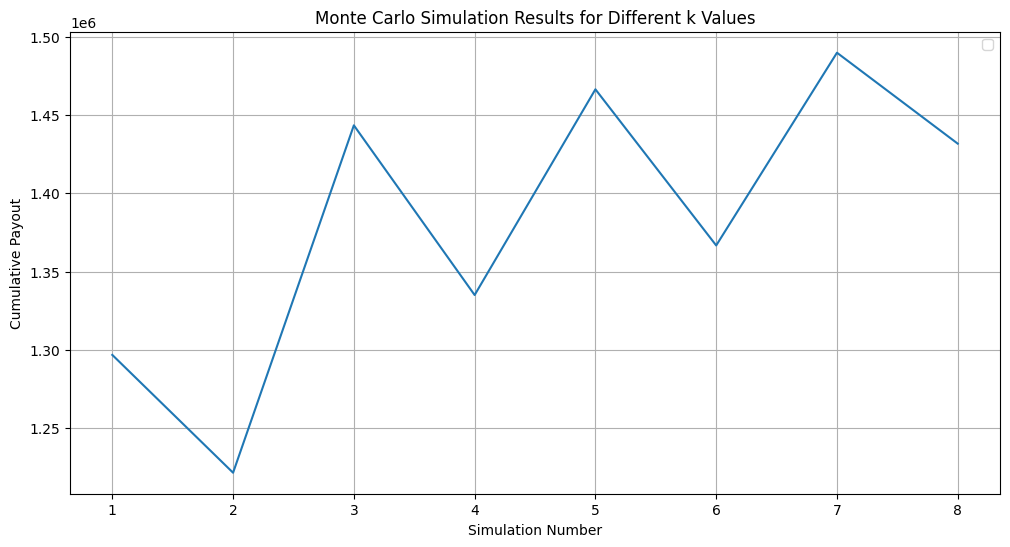

In [84]:
import matplotlib.pyplot as plt
n = 19  # Number of good players
k_values = [1, 2, 3, 4, 5, 6, 7, 8]  # Different numbers of bad players
num_simulations = 1000000
starting_payout = 5_000_000
daily_payout = 0

# Run the simulation for each k and plot the results
plt.figure(figsize=(12, 6))
payouts=[]
for k in k_values:
    results = monte_carlo_simulation(n, k, starting_payout, num_simulations)
    payouts.append(results['Expected Payout per Bad Player'])
    print("Monte Carlo Simulation Results (After Modification):")
    print(f"Expected Payout per Good Player: {results['Expected Payout per Good Player']:.4f}")
    print(f"Expected Payout per Bad Player: {results['Expected Payout per Bad Player']:.4f}")
    print(f"Probability Good Team Wins: {results['Probability Good Wins'] * 100:.2f}%")
    print(f"Probability Bad Team Wins: {results['Probability Bad Wins'] * 100:.2f}%")
    print(f"Average number of turns: {results['Average number of turns']:.2f}")

plt.plot( k_values, payouts,)
plt.xticks(k_values)
plt.xlabel('Simulation Number')
plt.ylabel('Cumulative Payout')
plt.title('Monte Carlo Simulation Results for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

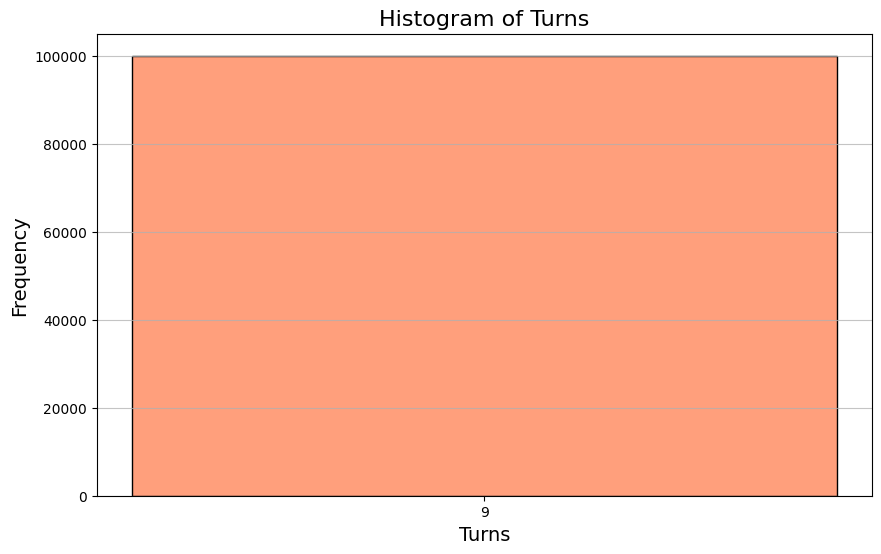

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example list of integers

# Determine the range of data
min_turn = int(min(turns_list))
max_turn = int(max(turns_list))

# Define bin edges
bins = np.arange(min_turn - 0.5, max_turn + 1.5, 1)

# Create the histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(turns_list, bins=bins, kde=False, color='coral', edgecolor='black')

# Add title and labels
plt.title('Histogram of Turns', fontsize=16)
plt.xlabel('Turns', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set x-axis ticks to integers
plt.xticks(range(min_turn, max_turn + 1))

# Add grid
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()


In [62]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def simulate_game(n_good_initial, k_bad_initial, starting_payout=0):
    """
    Simulates a single game based on the updated rules.

    Args:
        n_good_initial (int): Initial number of good players.
        k_bad_initial (int): Initial number of bad players.
        starting_payout (int, optional): Starting payout. Defaults to 0.

    Returns:
        dict: Outcome of the game containing winner, payouts, and remaining players.
    """
    # Initialize the list of players
    # 'G' represents a good player, 'B' represents a bad player
    players = ['G'] * n_good_initial + ['B'] * k_bad_initial
    payout_cumulated = starting_payout
    while True:
        payout_cumulated += 1
        n_good = players.count('G')
        n_bad = players.count('B')

        # Check for termination based on new rules
        if n_good == 0:
            # Bad team wins
            remaining = n_bad
            payout = payout_cumulated / remaining
            return {
                'winner': 'Bad',
                'payouts': [payout] * remaining,
                'remaining_good': 0,
                'remaining_bad': remaining
            }
        if n_bad == 0:
            # Good team wins
            remaining = n_good
            payout = payout_cumulated / remaining
            return {
                'winner': 'Good',
                'payouts': [payout] * remaining,
                'remaining_good': remaining,
                'remaining_bad': 0
            }
        if n_good <= n_bad:
            # Bad team wins as per the new condition
            remaining = n_bad
            payout = payout_cumulated / remaining
            return {
                'winner': 'Bad',
                'payouts': [payout] * remaining,
                'remaining_good': 0,
                'remaining_bad': remaining
            }

        # Step 1: Bad players kill a good player
        if n_good > 0 and n_bad > 0:
            # Randomly select a good player to be killed
            good_indices = [i for i, p in enumerate(players) if p == 'G']
            killed_good_player = random.choice(good_indices)
            players.pop(killed_good_player)

        # Update counts after step 1
        n_good = players.count('G')
        n_bad = players.count('B')

        # Check for termination after step 1
        if n_good == 0:
            # Bad team wins
            remaining = n_bad
            payout = payout_cumulated / remaining
            return {
                'winner': 'Bad',
                'payouts': [payout] * remaining,
                'remaining_good': 0,
                'remaining_bad': remaining
            }
        if n_bad == 0:
            # Good team wins
            remaining = n_good
            payout = payout_cumulated / remaining
            return {
                'winner': 'Good',
                'payouts': [payout] * remaining,
                'remaining_good': remaining,
                'remaining_bad': 0
            }
        if n_good <= n_bad:
            # Bad team wins as per the new condition
            remaining = n_bad
            payout = payout_cumulated / remaining
            return {
                'winner': 'Bad',
                'payouts': [payout] * remaining,
                'remaining_good': 0,
                'remaining_bad': remaining
            }

        # Step 2: Random player dies
        dead_player = random.choice(players)
        players.remove(dead_player)

def monte_carlo_simulation(n_good, k_bad, starting_payout, num_simulations=1000):
    """
    Runs the Monte Carlo simulation based on the updated game rules.

    Args:
        n_good (int): Initial number of good players.
        k_bad (int): Initial number of bad players.
        starting_payout (int): Starting payout.
        num_simulations (int, optional): Number of simulations to run. Defaults to 1000.

    Returns:
        dict: Aggregated results including expected payouts, win probabilities, and turns.
    """
    total_payout_good = 0.0
    total_payout_bad = 0.0
    count_wins_good = 0
    count_wins_bad = 0
    turns_good = []
    turns_bad = []

    for _ in range(num_simulations):
        result = simulate_game(n_good, k_bad, starting_payout)
        winner = result['winner']
        payout = result['payouts'][0]
        remaining_good = result['remaining_good']
        remaining_bad = result['remaining_bad']
        turns = sum(result['payouts']) - starting_payout  # Number of turns

        if winner == 'Good':
            count_wins_good += 1
            total_payout_good += sum(result['payouts'])
            turns_good.append(turns)
        else:
            count_wins_bad += 1
            total_payout_bad += sum(result['payouts'])
            turns_bad.append(turns)

    # Calculate expected payouts per player
    expected_payout_good = (total_payout_good / num_simulations) / n_good
    expected_payout_bad = (total_payout_bad / num_simulations) / k_bad
    probability_win_good = count_wins_good / num_simulations
    probability_win_bad = count_wins_bad / num_simulations

    return {
        'Expected Payout per Good Player': expected_payout_good,
        'Expected Payout per Bad Player': expected_payout_bad,
        'Probability Good Wins': probability_win_good,
        'Probability Bad Wins': probability_win_bad,
        'Turns Good': turns_good,
        'Turns Bad': turns_bad
    }

# Parameters
n = 19  # Number of good players
k = 3   # Number of bad players
num_simulations = 10000
starting_payout = 0

# Run the simulation
results = monte_carlo_simulation(n, k, starting_payout, num_simulations)

# Display the results
print("Monte Carlo Simulation Results (After Modification):")
print(f"Expected Payout per Good Player: {results['Expected Payout per Good Player']:.4f}")
print(f"Expected Payout per Bad Player: {results['Expected Payout per Bad Player']:.4f}")
print(f"Probability Good Team Wins: {results['Probability Good Wins'] * 100:.2f}%")
print(f"Probability Bad Team Wins: {results['Probability Bad Wins'] * 100:.2f}%")
print(f"Average number of turns (Good Wins): {np.mean(results['Turns Good']):.2f}")
print(f"Average number of turns (Bad Wins): {np.mean(results['Turns Bad']):.2f}")


Monte Carlo Simulation Results (After Modification):
Expected Payout per Good Player: 0.1730
Expected Payout per Bad Player: 2.3067
Probability Good Team Wins: 33.02%
Probability Bad Team Wins: 66.98%
Average number of turns (Good Wins): 9.95
Average number of turns (Bad Wins): 10.33


C:\Users\takat\AppData\Local\Temp\ipykernel_36564\3779624415.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


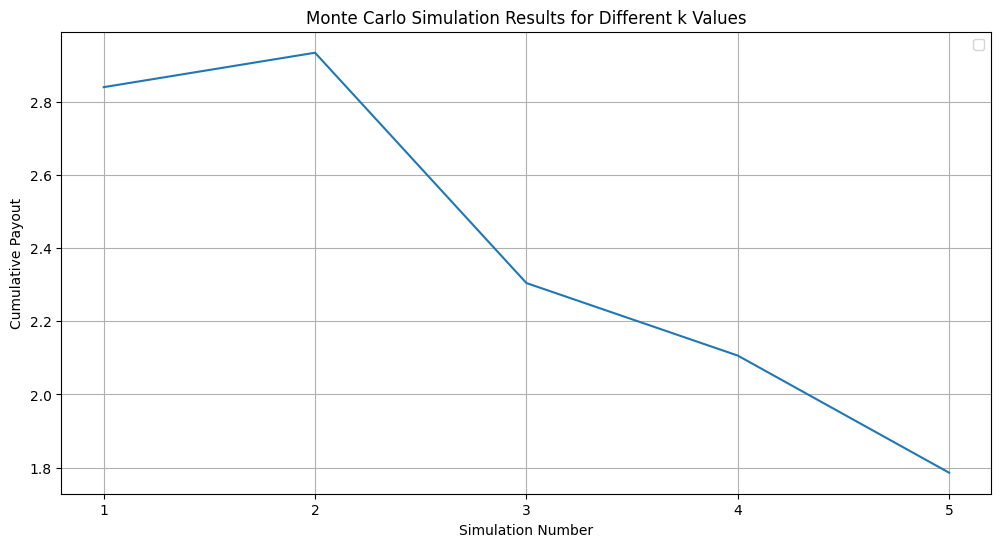

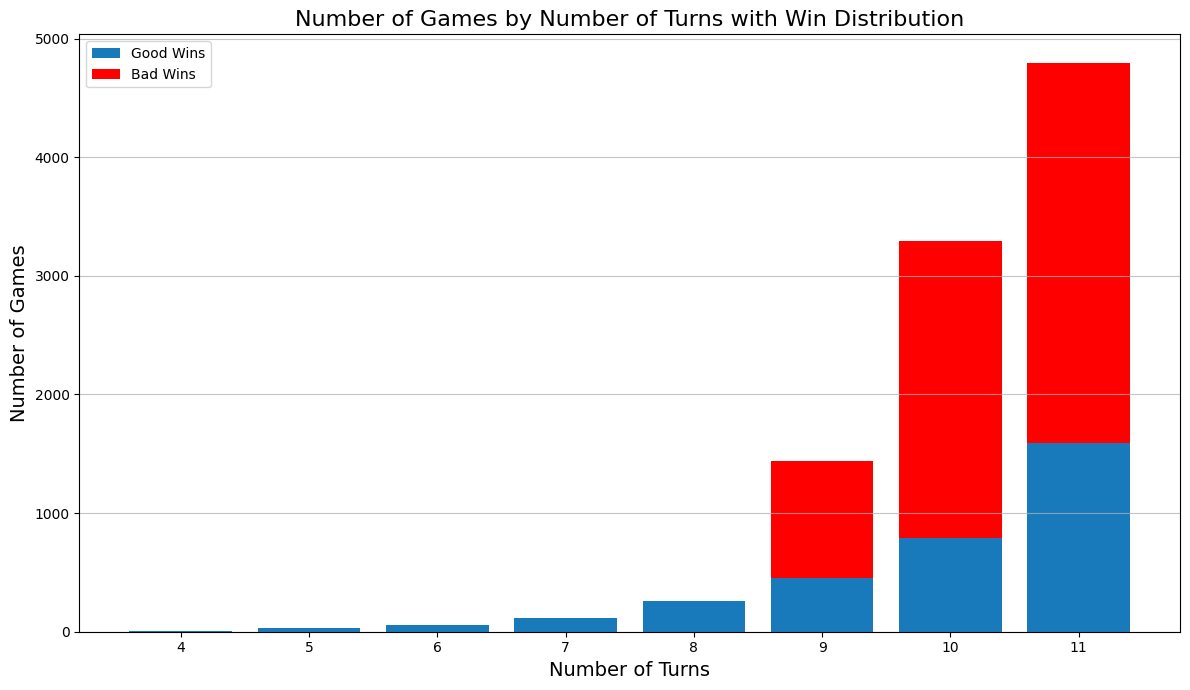

In [63]:

# Plotting the stacked histogram
turns_good = results['Turns Good']
turns_bad = results['Turns Bad']

# Determine the range of data
min_turn = min(min(turns_good, default=0), min(turns_bad, default=0))
max_turn = max(max(turns_good, default=0), max(turns_bad, default=0))

# Define bin edges
bins = np.arange(min_turn - 0.5, max_turn + 1.5, 1)

# Calculate the counts for each turn and winner
counts_good, _ = np.histogram(turns_good, bins=bins)
counts_bad, _ = np.histogram(turns_bad, bins=bins)

# Calculate the total counts per turn
total_counts = counts_good + counts_bad

# Define the x-axis positions
turn_numbers = np.arange(min_turn, max_turn + 1)

# Plot the stacked histogram using Matplotlib
plt.figure(figsize=(12, 7))
plt.bar(turn_numbers, counts_good, width=0.8, color='#187ABA', label='Good Wins')
plt.bar(turn_numbers, counts_bad, bottom=counts_good, width=0.8, color='red', label='Bad Wins')

# Add labels and title
plt.xlabel('Number of Turns', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.title('Number of Games by Number of Turns with Win Distribution', fontsize=16)
plt.xticks(turn_numbers)  # Set x-axis ticks to integer turn numbers
plt.legend()

# Add grid for better readability
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.tight_layout()
plt.show()
